# Sorting images into three size groups

This script produces `.txt` files that contain the filenames of all images belonging to a certain size group that can be specified via thresholds.

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Replace the absolute_path with the absolute path you want to set
absolute_path = "/Users/claire/Downloads/DUTS-TR"

# Use os.chdir to change the working directory
os.chdir(absolute_path)

# Show current working directory
%pwd

'/Users/claire/Downloads/DUTS-TR'

## Show examples of images and masks

In [21]:
def display_image_and_mask(image_path, mask_path):
    # Load image and mask
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the image
    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[0].axis('off')

    # Display the mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Binary Segmentation Mask')
    axes[1].axis('off')

    plt.show()

def count_white_pixels(mask_path):
    mask = Image.open(mask_path)
    mask_array = np.array(mask)
    white_pixel_count = np.sum(mask_array == 255)
    return white_pixel_count

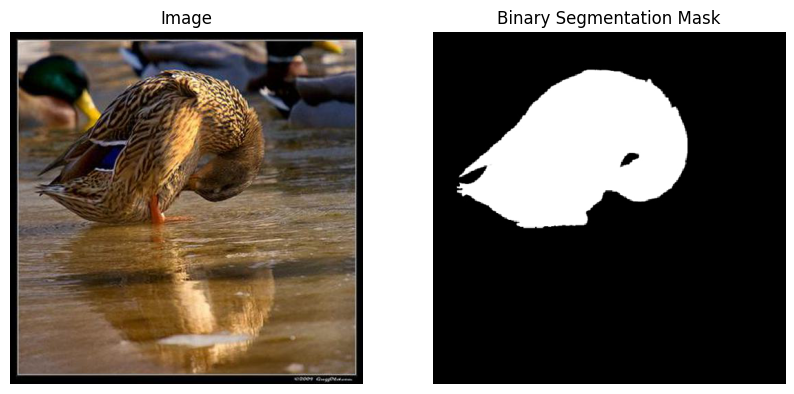

The number of white pixels in the mask is: 46907


In [23]:
# Replace these paths with the actual paths to your images and masks
image_path = '/Users/claire/Downloads/Datasets/DUTS-TR_resized/img/ILSVRC2012_test_00000030.jpg'
mask_path = '/Users/claire/Downloads/Datasets/DUTS-TR_resized/gt/ILSVRC2012_test_00000030.png'

display_image_and_mask(image_path, mask_path)
white_pixel_count = count_white_pixels(mask_path)

print(f'The number of white pixels in the mask is: {white_pixel_count}')

## Function sorting images into three groups (small, medium, large)

In [14]:
def process_image_mask_pairs(img_folder, gt_folder, output_file_path, lower_threshold, upper_threshold):
    # Initialize a count variable to track the number of filenames written
    num_filenames_written = 0

    # Open the file in write mode, clearing existing content if the file exists
    with open(output_file_path, 'w') as output_file:
        # Iterate over all image files in the img folder
        for img_filename in os.listdir(img_folder):
            # Check if the file is a JPG image
            if img_filename.endswith('.jpg'):
                img_path = os.path.join(img_folder, img_filename)
                
                # Form the corresponding mask file path based on the image filename
                mask_filename = img_filename.replace('.jpg', '.png')
                mask_path = os.path.join(gt_folder, mask_filename)

                # Check if the mask file exists
                if os.path.exists(mask_path):
                    # Count white pixels in the mask
                    white_pixel_count = count_white_pixels(mask_path)

                    # Check if the count is within the specified thresholds
                    if lower_threshold <= white_pixel_count <= upper_threshold:
                        # Write the filenames to the output file
                        output_file.write(f'{img_filename[:-4]}\n')
                        num_filenames_written += 1

    return num_filenames_written

In [26]:
# Replace these paths with the actual paths to your image and mask folders
img_folder = '/Users/claire/Downloads/Datasets/MSRA10K_resized/img'
gt_folder = '/Users/claire/Downloads/Datasets/MSRA10K_resized/gt'

# Replace this path with the desired output text file
output_file_path = '/Users/claire/Downloads/Datasets/MSRA10K_resized/medium.txt'

# Set the upper and lower thresholds for white_pixel_count
# small:  lower = 0,     upper = 25000
# medium: lower = 40000, upper = 65000
# large:  lower = 90000, upper = 262144
lower_threshold = 40000
upper_threshold = 65000

# Call the function and get the number of filenames written
num_filenames_written = process_image_mask_pairs(img_folder, gt_folder, output_file_path, lower_threshold, upper_threshold)

print(f'Processing complete. Results written to: {output_file_path}')
print(f'Number of filenames written to the file: {num_filenames_written}')

Processing complete. Results written to: /Users/claire/Downloads/Datasets/MSRA10K_resized/medium.txt
Number of filenames written to the file: 2777
